# Метод главных компонент (Principal Component Analysis)

Load the packages:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.cm as cm
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
%precision 7

'%.7f'

Read in the data:

In [2]:
fat = pd.read_csv("http://www.calvin.edu/~stob/data/fat.csv")
fat.head()

,brozek,siri,density,age,weight,height,adipos,free,neck,chest,abdom,hip,thigh,knee,ankle,biceps,forearm,wrist
0,12.6,12.3,1.0708,23,154.25,67.75,23.7,134.9,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,6.9,6.1,1.0853,22,173.25,72.25,23.4,161.3,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,24.6,25.3,1.0414,22,154.00,66.25,24.7,116.0,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,10.9,10.4,1.0751,26,184.75,72.25,24.9,164.7,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,27.8,28.7,1.0340,24,184.25,71.25,25.6,133.1,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


## Principal Components Analysis

Some plots of the data:

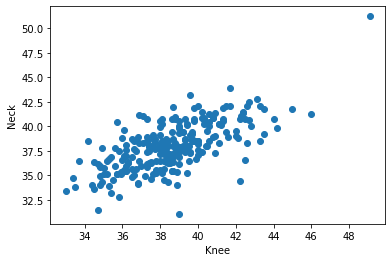

In [3]:
plt.scatter(fat.knee, fat.neck)
plt.xlabel("Knee")
plt.ylabel("Neck")
plt.show()

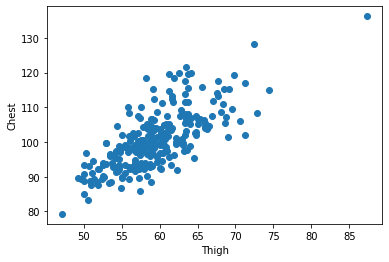

In [4]:
plt.scatter(fat.thigh, fat.chest)
plt.xlabel("Thigh")
plt.ylabel("Chest")
plt.show()

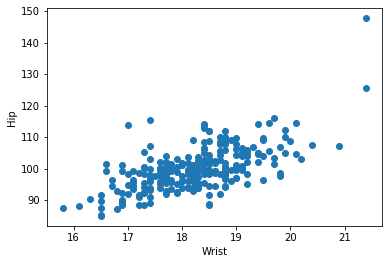

In [5]:
plt.scatter(fat.wrist, fat.hip)
plt.xlabel("Wrist")
plt.ylabel("Hip")
plt.show()



Consider only the circumference measurements:

In [11]:
cfat = fat.iloc[:,8:]
cfat.head()

,neck,chest,abdom,hip,thigh,knee,ankle,biceps,forearm,wrist
0,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


Get PCA from `sklearn`

In [35]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(cfat)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

SDs of the principal components

In [36]:
np.sqrt(pca.explained_variance_)

array([ 15.9902105,   4.0658424,   2.9659647,   2.0004442,   1.6940811,
         1.4988076,   1.3032232,   1.2547797,   1.109552 ,   0.527372 ])

Proportion of explained variance

In [14]:
pca.explained_variance_ratio_

array([ 0.8669847,  0.0560537,  0.0298287,  0.0135693,  0.0097313,
        0.0076172,  0.0057589,  0.0053387,  0.0041744,  0.0009431])

In [15]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([  86.7 ,   92.31,   95.29,   96.65,   97.62,   98.38,   98.96,
         99.49,   99.91,  100.  ])

Get the rotation matrix

In [16]:
rot = pca.components_
rot.shape

(10, 10)

Rows are the loadings. Here is the first:

In [17]:
rot[0,:]

array([ 0.1224786,  0.5016164,  0.6580829,  0.4195671,  0.2796875,
        0.1214856,  0.0559626,  0.1454063,  0.0739148,  0.039348 ])

Redo with scaled data

In [18]:
from sklearn.preprocessing import scale
scalfat = pd.DataFrame(scale(cfat))
scalfat.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.738665,-0.918048,-0.683533,-0.755929,-0.077479,-0.536131,-0.710826,-0.090676,-0.626718,-1.212541
1,0.209365,-0.858621,-0.887963,-0.168502,-0.134736,-0.536131,0.175947,-0.588143,0.117079,-0.031943
2,-1.645475,-0.597144,-0.432643,-0.098570,0.037035,0.128592,0.530656,-1.151940,-1.717621,-1.749177
3,-0.244041,0.115976,-0.572026,0.181157,0.132464,-0.536131,-0.178762,0.041982,0.365012,-0.031943
4,-1.480601,-0.418864,0.691719,0.279061,0.724121,1.499585,0.530656,-0.024347,-0.477959,-0.568578


In [19]:
pcac = PCA()
pcac.fit(scalfat)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [20]:
np.sqrt(pcac.explained_variance_)

array([ 2.6550681,  0.8547028,  0.8207202,  0.7025369,  0.5481656,
        0.5293576,  0.4528597,  0.4061987,  0.278819 ,  0.2535215])

In [21]:
pcac.explained_variance_ratio_

array([ 0.7021413,  0.0727618,  0.0670909,  0.04916  ,  0.0299293,
        0.0279108,  0.0204268,  0.0164343,  0.0077432,  0.0064018])

In [22]:
np.cumsum(np.round(pcac.explained_variance_ratio_, decimals=4)*100)

array([ 70.21,  77.49,  84.2 ,  89.12,  92.11,  94.9 ,  96.94,  98.58,
        99.35,  99.99])

PC1 is mostly a weighted average

In [23]:
rotc = pcac.components_
rotc[0,:]

array([ 0.3272162,  0.338517 ,  0.3341249,  0.3477307,  0.3327963,
        0.3288933,  0.246596 ,  0.3221654,  0.2701136,  0.298821 ])

In [24]:
rotc[1,:]

array([-0.0027708, -0.2732976, -0.398488 , -0.2546432, -0.1914145,
        0.0216185,  0.624646 ,  0.021591 ,  0.362762 ,  0.3772439])

Do the principal components regression. First do the OLS regression on the scaled predictors:

In [37]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
xmat = sm.add_constant(cfat)
lmod = sm.OLS(fat.brozek, xmat).fit()
lmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 brozek   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     66.87
Date:                Wed, 20 May 2020   Prob (F-statistic):           8.61e-64
Time:                        00:40:53   Log-Likelihood:                -705.75
No. Observations:                 252   AIC:                             1433.
Df Residuals:                     241   BIC:                             1472.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.2287      6.214      1.163      0.246      -5.013      19.470
neck          -0.5819      0.209     -2.790      0.006      -0.993      -0.171
chest         -0.0908      0.085     -1.063      0.289      -0.259       0.077
abdom          0.9602      0.072     13.414      0.000       0.819       1.101
hip           -0.3914      0.113     -3.473      0.001      -0.613      -0.169
thigh          0.1337      0.125      1.070      0.286      -0.112       0.380
knee          -0.0941      0.212     -0.443      0.658      -0.512       0.324
ankle          0.0042      0.203      0.021      0.983      -0.396       0.404
biceps         0.1112      0.159      0.699      0.485      -0.202       0.425
forearm        0.3445      0.186      1.857      0.064      -0.021       0.710
wrist         -1.3535      0.471     -2.871      0.004      -2.282      -0.425
==============================================================================
Omnibus:                        3.067   Durbin-Watson:                   1.809
Prob(Omnibus):                  0.216   Jarque-Bera (JB):                2.407
Skew:                           0.102   Prob(JB):                        0.300
Kurtosis:                       2.567   Cond. No.                     4.73e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.73e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Now use only the first 2 principal components:

In [31]:
pcscores = pca.fit_transform(scale(cfat))
pcscores[:6,:2]

array([[-1.981955 , -0.4096865],
       [-0.9226158,  0.7726571],
       [-2.0916847, -0.6154022],
       [-0.2424826,  0.1234552],
       [ 0.2600856, -0.3912457],
       [ 2.7822092,  0.8457063]])

In [32]:
xmat = sm.add_constant(pcscores[:,:2])
lmod = sm.OLS(fat.brozek, xmat).fit()
lmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 brozek   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                     151.7
Date:                Sun, 17 May 2020   Prob (F-statistic):           8.27e-44
Time:                        00:15:19   Log-Likelihood:                -772.72
No. Observations:                 252   AIC:                             1551.
Df Residuals:                     249   BIC:                             1562.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.9385      0.329     57.542      0.000      18.290      19.587
x1             1.8383      0.124     14.800      0.000       1.594       2.083
x2            -3.5435      0.386     -9.184      0.000      -4.303      -2.784
==============================================================================
Omnibus:                        4.795   Durbin-Watson:                   1.710
Prob(Omnibus):                  0.091   Jarque-Bera (JB):                5.463
Skew:                           0.165   Prob(JB):                       0.0651
Kurtosis:                       3.641   Cond. No.                         3.11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
cfat.columns

Index(['neck', 'chest', 'abdom', 'hip', 'thigh', 'knee', 'ankle', 'biceps',
       'forearm', 'wrist'],
      dtype='object')

Use a simplified model using only abdomen and ankle:

In [34]:
xmat = pd.concat([scalfat.iloc[:,2], scalfat.iloc[:,6] - scalfat.iloc[:,2]],axis=1)
xmat = sm.add_constant(xmat)
lmod = sm.OLS(fat.brozek, xmat).fit()
lmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 brozek   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     258.8
Date:                Sun, 17 May 2020   Prob (F-statistic):           1.56e-61
Time:                        00:15:28   Log-Likelihood:                -731.42
No. Observations:                 252   AIC:                             1469.
Df Residuals:                     249   BIC:                             1479.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.9385      0.279     67.789      0.000      18.388      19.489
2              5.7514      0.328     17.548      0.000       5.106       6.397
0             -0.9931      0.313     -3.169      0.002      -1.610      -0.376
==============================================================================
Omnibus:                        0.652   Durbin-Watson:                   1.871
Prob(Omnibus):                  0.722   Jarque-Bera (JB):                0.386
Skew:                           0.030   Prob(JB):                        0.824
Kurtosis:                       3.182   Cond. No.                         1.79
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

############################################################################################################################

Read in the meat spectrometer data:

Regression on the training set produces a very good fit.

In [68]:
meatspec = pd.read_csv("https://raw.githubusercontent.com/LeoUCD/Linear_Models_in_Python/master/Data/meatspec.csv")
meatspec.head()
#meatspec.shape[0]

,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V92,V93,V94,V95,V96,V97,V98,V99,V100,fat
0,1,2.61776,2.61814,2.61859,2.61912,2.61981,2.62071,2.62186,2.62334,2.62511,...,2.98145,2.96072,2.94013,2.91978,2.89966,2.87964,2.85960,2.83940,2.81920,22.5
1,2,2.83454,2.83871,2.84283,2.84705,2.85138,2.85587,2.86060,2.86566,2.87093,...,3.29186,3.27921,3.26655,3.25369,3.24045,3.22659,3.21181,3.19600,3.17942,40.1
2,3,2.58284,2.58458,2.58629,2.58808,2.58996,2.59192,2.59401,2.59627,2.59873,...,2.68951,2.67009,2.65112,2.63262,2.61461,2.59718,2.58034,2.56404,2.54816,8.4
3,4,2.82286,2.82460,2.82630,2.82814,2.83001,2.83192,2.83392,2.83606,2.83842,...,2.97367,2.94951,2.92576,2.90251,2.87988,2.85794,2.83672,2.81617,2.79622,5.9
4,5,2.78813,2.78989,2.79167,2.79350,2.79538,2.79746,2.79984,2.80254,2.80553,...,3.30025,3.27907,3.25831,3.23784,3.21765,3.19766,3.17770,3.15770,3.13753,25.5


In [96]:
trainmeat = meatspec.iloc[:172, 1:]
testmeat = meatspec.iloc[173:, 1:]
trainmeat.head()
#trainmeat.shape

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V92,V93,V94,V95,V96,V97,V98,V99,V100,fat
0,2.61776,2.61814,2.61859,2.61912,2.61981,2.62071,2.62186,2.62334,2.62511,2.62722,...,2.98145,2.96072,2.94013,2.91978,2.89966,2.87964,2.85960,2.83940,2.81920,22.5
1,2.83454,2.83871,2.84283,2.84705,2.85138,2.85587,2.86060,2.86566,2.87093,2.87661,...,3.29186,3.27921,3.26655,3.25369,3.24045,3.22659,3.21181,3.19600,3.17942,40.1
2,2.58284,2.58458,2.58629,2.58808,2.58996,2.59192,2.59401,2.59627,2.59873,2.60131,...,2.68951,2.67009,2.65112,2.63262,2.61461,2.59718,2.58034,2.56404,2.54816,8.4
3,2.82286,2.82460,2.82630,2.82814,2.83001,2.83192,2.83392,2.83606,2.83842,2.84097,...,2.97367,2.94951,2.92576,2.90251,2.87988,2.85794,2.83672,2.81617,2.79622,5.9
4,2.78813,2.78989,2.79167,2.79350,2.79538,2.79746,2.79984,2.80254,2.80553,2.80890,...,3.30025,3.27907,3.25831,3.23784,3.21765,3.19766,3.17770,3.15770,3.13753,25.5


In [85]:
modlm = sm.OLS(trainmeat.fat, sm.add_constant(trainmeat.iloc[:,:-1])).fit()
modlm.rsquared

0.9970196

Set up an RMSE function

In [86]:
def rmse(x,y):
    return np.sqrt(np.mean((x-y)**2))

RMSE on the training data:

In [87]:
rmse(modlm.fittedvalues, trainmeat.fat)

0.6903167

RMSE on the test data:

In [88]:
testpv = modlm.predict(sm.add_constant(testmeat.iloc[:,:-1]))
rmse(testpv, testmeat.fat)

3.8590676

Do some feature selection first. No need to scale since variables are commensurate. This method takes the largest coefficients.

In [89]:
from sklearn.feature_selection import RFECV
from sklearn import linear_model
reg = linear_model.LinearRegression(fit_intercept=True)
X = trainmeat.drop('fat',axis=1)
reg.fit(X, trainmeat.fat)
selector = RFECV(reg, step=1, cv=10)
selector = selector.fit(X, trainmeat.fat)
selector.ranking_

array([ 1,  1, 46,  1,  1,  1,  1,  1, 69, 49, 16, 50, 35,  6,  1, 33,  1,
       67, 42, 56,  1,  1,  1, 21,  1, 24, 43, 17, 13, 30, 36, 34, 55, 31,
       51, 52, 53, 81, 10, 23,  9,  7,  8, 27, 28, 26, 77, 54, 66, 37, 38,
       41, 40, 82, 44, 63, 73, 70, 62, 61, 60, 45, 15, 14, 32, 59, 75, 48,
       47, 57, 74, 22,  1,  1, 78, 76, 29, 12, 11,  1,  1, 25, 18,  1,  1,
       64,  5, 65, 79, 72, 71, 19, 20, 68, 58,  4,  3,  2, 39, 80])

Only a small number of predictors are selected:

In [90]:
Xmat = X.iloc[:,selector.support_]
Xmat.shape

(172, 19)

In [91]:
modsteplm = sm.OLS(trainmeat.fat, sm.add_constant(Xmat)).fit()
rmse(modsteplm.fittedvalues, trainmeat.fat)

2.7454516

Result on the test set is much better than before.

In [92]:
Xmatest = testmeat.drop('fat',axis=1)
testpv = modsteplm.predict(sm.add_constant(Xmatest.iloc[:,selector.support_]))
rmse(testpv, testmeat.fat)

2.5191785

### Principal Components on spectrometer data

In [98]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [99]:
sd10 = np.sqrt(pca.explained_variance_).round(2)[:10]
sd10

array([ 5.06,  0.51,  0.28,  0.17,  0.04,  0.02,  0.01,  0.01,  0.  ,  0.  ])

In [100]:
pcscores = pca.fit_transform(X)
pcscores.shape

(172, 100)

Need to invert PC2 because direction is different from R (not a problem - this just happens).

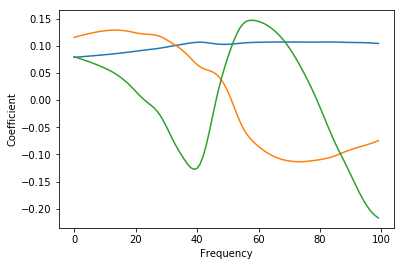

In [101]:
freq = np.arange(0,100)
rotc = pca.components_
plt.plot(freq, rotc[0,:])
plt.plot(freq, -rotc[1,:])
plt.plot(freq, rotc[2,:])
plt.xlabel("Frequency")
plt.ylabel("Coefficient")
plt.show()

In [102]:
pcrmod = sm.OLS(trainmeat.fat, sm.add_constant(pcscores[:,:4])).fit()
rmse(pcrmod.fittedvalues, trainmeat.fat)

4.0647452

Plot the effect of predictors using a linear model

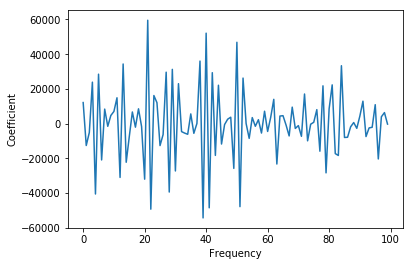

In [103]:
plt.plot(freq,modlm.params[1:])
plt.xlabel("Frequency")
plt.ylabel("Coefficient")
plt.show()

In [104]:
pcrmod.params

const    18.093023
x1        1.198706
x2        3.386954
x3      -27.093717
x4      -40.533933
dtype: float64

Can duplicate

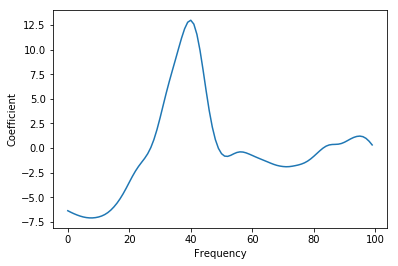

In [105]:
pceff = np.dot(pca.components_[:4,].T, pcrmod.params[1:])
plt.plot(freq, pceff)
plt.xlabel("Frequency")
plt.ylabel("Coefficient")
plt.show()

Can do the same thing using the @ operator but the vector needs to be a numpy array.

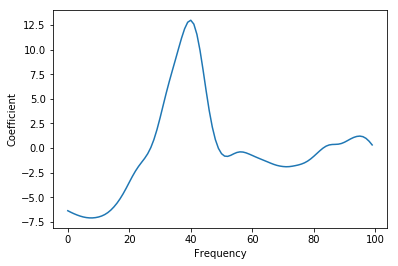

In [106]:
pceff = pca.components_[:4,].T @ np.array(pcrmod.params[1:])
plt.plot(freq, pceff)
plt.xlabel("Frequency")
plt.ylabel("Coefficient")
plt.show()

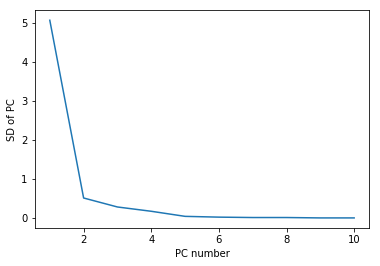

In [107]:
plt.plot(np.arange(1,11), sd10)
plt.xlabel("PC number")
plt.ylabel("SD of PC")
plt.show()

Demonstrate the method by which the design matrix in the PCR is constructed from the original X matrix and the loadings. Note that X needs to be centered.

In [49]:
m = X.mean(axis=0)
Xc = X - m
rotX = Xc @ pca.components_[:4,].T
rotX.iloc[0,:]

0   -2.244544
1    0.221631
2   -0.105484
3    0.042954
Name: 1, dtype: float64

In [50]:
pcscores[0,:4]

array([-2.2445444,  0.2216308, -0.1054843,  0.042954 ])

Now do it for the test data. 

In [51]:
Xtest = testmeat.drop('fat',axis=1)
Xtestc = Xtest - m
rotX = Xtestc @ pca.components_[:4,].T
testpv = pcrmod.params[0] + np.dot(rotX,pcrmod.params[1:])
rmse(testpv, testmeat.fat)

4.52586819692492

In [52]:
ncomp = np.arange(1,51)
rmsep = np.empty(50)
for icomp in ncomp:
    Xtest = testmeat.drop('fat',axis=1)
    Xtestc = Xtest - m
    rotX = Xtestc @ pca.components_[:icomp,].T
    pcrmod = sm.OLS(trainmeat.fat, sm.add_constant(pcscores[:,:icomp])).fit()
    testpv = pcrmod.params[0] + np.dot(rotX,pcrmod.params[1:])
    rmsep[icomp-1] = rmse(testpv, testmeat.fat)

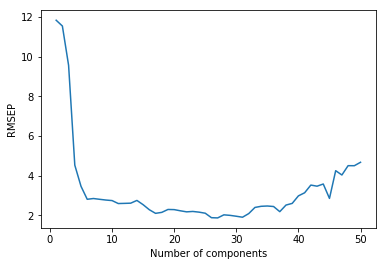

In [53]:
plt.plot(ncomp, rmsep)
plt.ylabel("RMSEP")
plt.xlabel("Number of components")
plt.show()

In [54]:
np.argmin(rmsep)+1

27

Use k-fold crossvalidation. 

In [55]:
from sklearn.model_selection import KFold
nsp = 10
kf = KFold(n_splits=nsp)
rmsep = np.empty(nsp)
y = np.asarray(trainmeat.fat)
ncomp = 50
irmsep = np.empty(ncomp)

In [56]:
for icomp in range(1,ncomp+1):
    Xtrain = sm.add_constant(pcscores[:,:icomp])
    for k, (train, test) in enumerate(kf.split(Xtrain, y)):
        pmod = sm.OLS(y[train], Xtrain[train,:]).fit()
        testpv = pmod.predict(Xtrain[test,:])
        rmsep[k] = rmse(testpv, y[test])
    irmsep[icomp-1] = rmsep.mean()

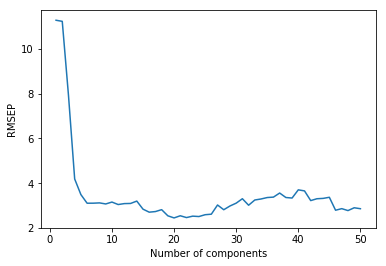

In [57]:
plt.plot(range(1,ncomp+1), irmsep)
plt.ylabel("RMSEP")
plt.xlabel("Number of components")
plt.show()

In [58]:
np.argmin(irmsep)+1

20

Chooses a different number of components than R and gets slightly worse performance

In [59]:
icomp = 20
pcrmod = sm.OLS(trainmeat.fat, sm.add_constant(pcscores[:,:icomp])).fit()
Xtrain = trainmeat.drop('fat',axis=1)
m = Xtrain.mean(axis=0)
Xtest = testmeat.drop('fat',axis=1) - m
rotX = Xtest @ pca.components_[:icomp,].T
testpv = pcrmod.params[0] + np.dot(rotX,pcrmod.params[1:])
rmse(testpv, testmeat.fat)

2.2867438349561002

# Для моделей

https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)



In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/patrickmlong/Breast-Cancer-Wisconsin-Diagnostic-DataSet/master/data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.00,0.12,0.28,0.30,0.15,...,17.33,184.60,2019.00,0.16,0.67,0.71,0.27,0.46,0.12,nan
1,842517,M,20.57,17.77,132.90,1326.00,0.08,0.08,0.09,0.07,...,23.41,158.80,1956.00,0.12,0.19,0.24,0.19,0.28,0.09,nan
2,84300903,M,19.69,21.25,130.00,1203.00,0.11,0.16,0.20,0.13,...,25.53,152.50,1709.00,0.14,0.42,0.45,0.24,0.36,0.09,nan
3,84348301,M,11.42,20.38,77.58,386.10,0.14,0.28,0.24,0.11,...,26.50,98.87,567.70,0.21,0.87,0.69,0.26,0.66,0.17,nan
4,84358402,M,20.29,14.34,135.10,1297.00,0.10,0.13,0.20,0.10,...,16.67,152.20,1575.00,0.14,0.20,0.40,0.16,0.24,0.08,nan


In [3]:
df['diagnosis'] = pd.Categorical(df.diagnosis).codes 
df.drop(df.columns[len(df.columns)-1], axis=1, inplace=True)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.00,0.12,0.28,0.30,0.15,...,25.38,17.33,184.60,2019.00,0.16,0.67,0.71,0.27,0.46,0.12
1,842517,1,20.57,17.77,132.90,1326.00,0.08,0.08,0.09,0.07,...,24.99,23.41,158.80,1956.00,0.12,0.19,0.24,0.19,0.28,0.09
2,84300903,1,19.69,21.25,130.00,1203.00,0.11,0.16,0.20,0.13,...,23.57,25.53,152.50,1709.00,0.14,0.42,0.45,0.24,0.36,0.09
3,84348301,1,11.42,20.38,77.58,386.10,0.14,0.28,0.24,0.11,...,14.91,26.50,98.87,567.70,0.21,0.87,0.69,0.26,0.66,0.17
4,84358402,1,20.29,14.34,135.10,1297.00,0.10,0.13,0.20,0.10,...,22.54,16.67,152.20,1575.00,0.14,0.20,0.40,0.16,0.24,0.08


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null int64
diagnosis                  569 non-null int8
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-n

In [5]:
X = df.drop(['id', 'diagnosis'], axis=1)
X.shape

(569, 30)

In [6]:
y = df['diagnosis']
y.shape

(569,)

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV

from sklearn.metrics import roc_auc_score

In [8]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [9]:
lr = LogisticRegressionCV(cv=5)

In [10]:
lr.fit(x_train, y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [11]:
y_pred = lr.predict_proba(x_test)[:, 1]

In [16]:
roc_auc_score(y_test, y_pred)

0.99799263967882235

In [20]:
def analyzePCA(X, pca, explained_threshold=0.95):
    """Plot cumulative explaned variance of PCA"""
    pca.fit(X)
    pca_variance = pca.explained_variance_ratio_
    plt.figure(figsize=(15,7))
    plt.plot(np.cumsum(pca_variance))
    plt.hlines(explained_threshold, 0, len(pca_variance))
    plt.title("Number of components to explain {}% of variance: {}".format(
        100*explained_threshold, np.argwhere(np.cumsum(pca_variance)>0.95)[0]
    ))
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance');

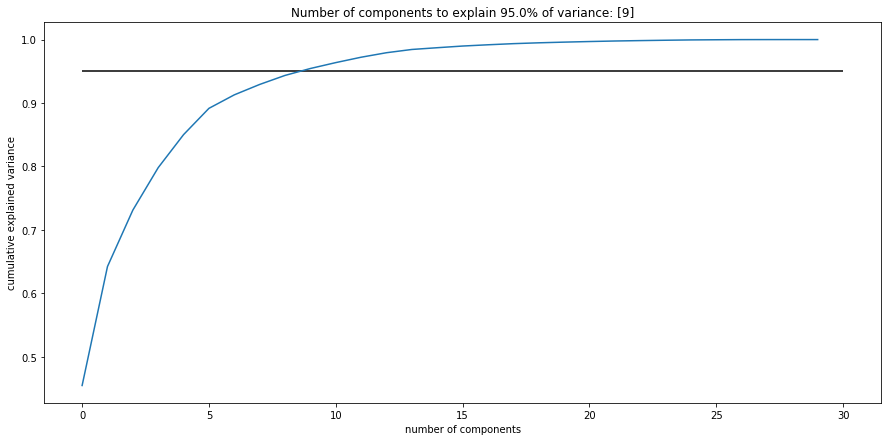

In [21]:
pca = PCA()
analyzePCA(x_train, pca)

In [22]:
pca = PCA(n_components=9)
x_train_pca = pca.fit_transform(x_train)

In [23]:
lr = LogisticRegressionCV(cv=5)
lr.fit(x_train_pca, y_train)
y_pred = lr.predict(pca.transform(x_test))
roc_auc_score(y_test, y_pred)

0.97959183673469385

# Дополнительные материалы
* https://georgemdallas.wordpress.com/2013/10/30/principal-component-analysis-4-dummies-eigenvectors-eigenvalues-and-dimension-reduction/
* https://www.kaggle.com/nirajvermafcb/principal-component-analysis-explained
* https://plot.ly/ipython-notebooks/principal-component-analysis/
* https://coolstatsblog.com/2015/03/21/principal-component-analysis-explained/
* http://blog.districtdatalabs.com/principal-component-analysis-with-python